In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
# set as seaborn’s default theme
sns.set_theme()
import glob     
import numpy as np
from PIL import Image
from collections import Counter
import os
import shutil

import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, SubsetRandomSampler, random_split
from torchsummary import summary
import torch.nn as nn
from torch import optim
from sklearn.model_selection import train_test_split
import torch
# Speeds up convolutions by trying different algorithms for computing convolutions
torch.backends.cudnn.benchmark = True

# Load the data path to images
# Rmb to mount your Gdrive
IMG_DIR = '/content/drive/MyDrive/2. SUTD/SUTD Term 8/50.021 Artificial Intelligence /fish_are_mans_friend/data/train'

# Batch Size
BATCH_SIZE = 16

# Label Map
label_map = {
    0: "ALB",
    1: "BET",
    2: "DOL",
    3: "LAG",
    4: "NoF",
    5: "OTHER",
    6: "SHARK",
    7: "YFT",
}

# We will assume that all images are of .jpg and .png extensions

In [ ]:
# Split our training dataset to train and valid
def perform_train_valid_split(train_dataset,test_size=0.3,shuffle=True):
    train, valid = train_test_split(
                                            np.arange(len(train_dataset.targets)),
                                            test_size=test_size,
                                            shuffle=shuffle
                                  )

    return train, valid

In [ ]:
# For using our pre-trained model VGG16, we need to ensure that we use the exact same pre-processing steps
# transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
#         transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0),
#         transforms.ToTensor(),
#         transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
#         )
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training and validation dataset
try:  
  dataset = datasets.ImageFolder(IMG_DIR, transform=transform)
#   dataset = datasets.ImageFolder(IMG_DIR)
  print(dataset)  
except FileNotFoundError:
  raise Exception("Try running cd train and rm -r .ipynb_checkpoints as it causing confusion https://stackoverflow.com/questions/68229246/pytorch-torchvision-datasets-imagefolder-filenotfounderror-found-no-valid-file") 

CLASSES = list(set(dataset.targets))
print([label_map[i] for i in CLASSES])

# randomly split train and validation data, we could also do a simple splice of 0.5 train - 0.5 validate.
valid_split = 0.2
data_size = len(dataset)
valid_size =  int(data_size * valid_split)
train_size =  data_size - valid_size

train_dataset, valid_dataset = random_split(dataset, [train_size,valid_size],generator=torch.Generator().manual_seed(42))

# # a simple custom collate function, just to show the idea
# def my_collate(batch):
#     data = [item[0] for item in batch]
#     target = [item[1] for item in batch]
#     target = torch.LongTensor(target)
#     return [data, target]


# train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers = 2, pin_memory=True, collate_fn=my_collate)
# valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, num_workers = 2, pin_memory=True, collate_fn=my_collate)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers = 2, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, num_workers = 2, pin_memory=True)

Dataset ImageFolder
    Number of datapoints: 3777
    Root location: /content/drive/MyDrive/2. SUTD/SUTD Term 8/50.021 Artificial Intelligence /fish_are_mans_friend/data/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


index:  0 0


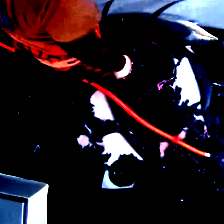

tensor(1)
index:  0 1


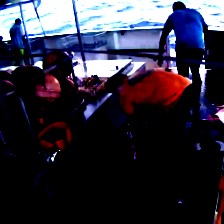

tensor(3)
index:  1 0


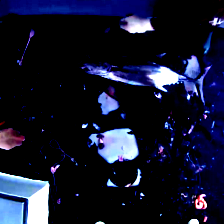

tensor(0)
index:  1 1


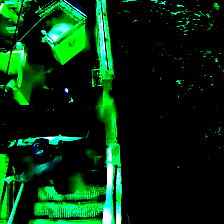

tensor(5)
index:  2 0


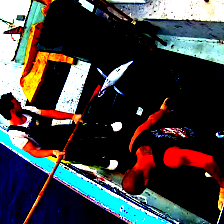

tensor(0)
index:  2 1


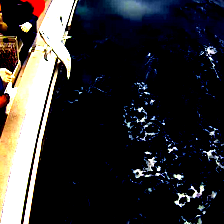

tensor(0)
index:  3 0


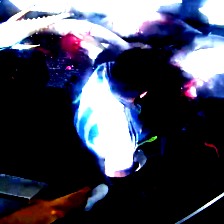

tensor(7)
index:  3 1


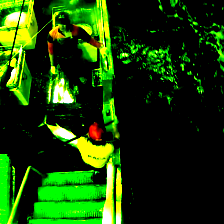

tensor(0)
index:  4 0


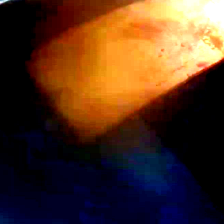

tensor(4)
index:  4 1


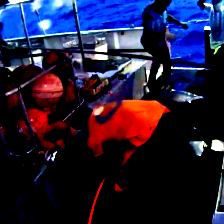

tensor(0)
index:  5 0


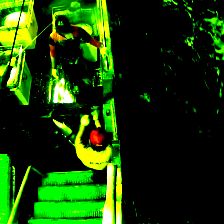

tensor(0)
index:  5 1


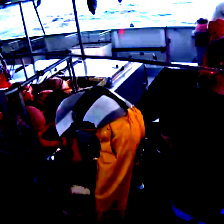

tensor(4)
index:  6 0


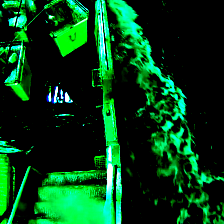

tensor(0)
index:  6 1


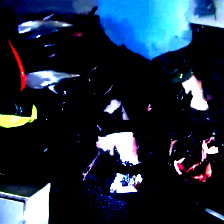

tensor(0)
index:  7 0


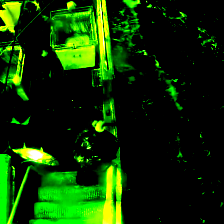

tensor(0)
index:  7 1


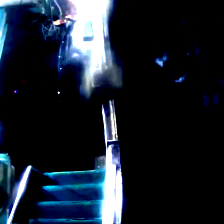

tensor(4)
index:  8 0


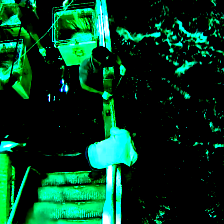

tensor(0)
index:  8 1


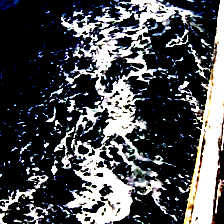

tensor(7)
index:  9 0


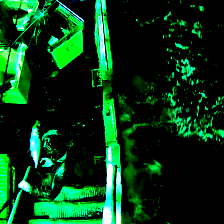

tensor(0)
index:  9 1


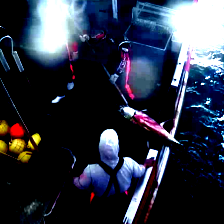

tensor(7)
index:  10 0


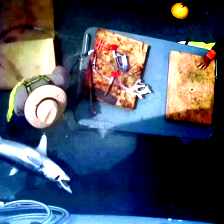

tensor(6)
index:  10 1


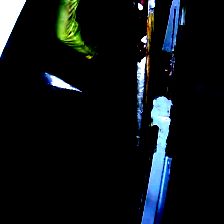

tensor(0)
index:  11 0


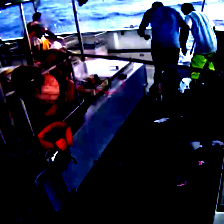

tensor(0)
index:  11 1


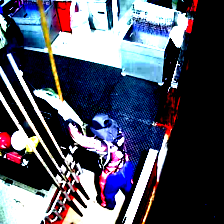

tensor(2)
index:  12 0


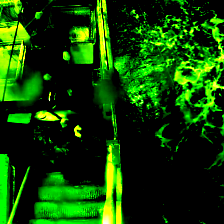

tensor(7)
index:  12 1


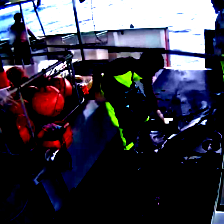

tensor(7)
index:  13 0


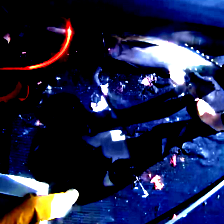

tensor(7)
index:  13 1


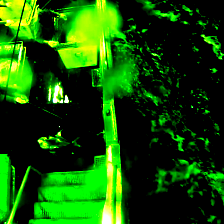

tensor(5)
index:  14 0


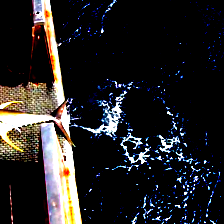

tensor(7)
index:  14 1


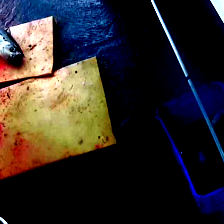

tensor(0)


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
a = 0
for i in train_dataloader:
    for j in range(len(i)):
        print("index: ", a, j)
        img = i[0][j].numpy().transpose((1, 2, 0))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img *= 255
        # img += -(np.min(img))
        # img /= np.max(img) / (max - min)
        # img += min
        cv2_imshow(img)
        print(i[1][j])

    a += 1
    if a == 15:
        break

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


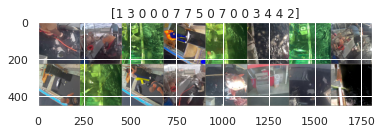

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
# Get a batch of training data
inputs, classes = next(iter(train_dataloader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs,nrows=20)
imshow(out,title=classes.numpy())

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=True)
# utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

print(efficientnet)

cuda


/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: p

  0%|          | 0.00/74.5M [00:00<?, ?B/s]

EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

In [ ]:
def weight_builder(label_map,data_size):
  weights = []
  for value in label_map.values():
    weights.append(len(glob.glob(f"{IMG_DIR}/{value}"))/data_size)
  return weights

In [ ]:
# Freeze model parameters because they were trained already
for param in efficientnet.parameters():
    param.requires_grad = False

# Change the final layer of Model for Transfer Learning
# Here the size of each output sample is set to 8
def augment_model(efficientnet):
    efficientnet.classifier[-1] = nn.Linear(in_features=1792, out_features=len(label_map), bias=True)
    return efficientnet

efficientnet = augment_model(efficientnet)

efficientnet = efficientnet.to(device)
# Create weights to handle class imbalance
weights = weight_builder(label_map,data_size)
# added weights to crossentropyloss for class imbalance
loss_fn = nn.CrossEntropyLoss(weight=torch.FloatTensor(weights).to(device))
# We will use ADAM as our opitimiser
optimizer_ft = optim.Adam(efficientnet.parameters(), lr=0.001)
# Exponentially Decay LR by a factor of 0.1
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

NameError: ignored

In [ ]:
import copy
import time
plot_train_acc = []
plot_train_loss = []
plot_val_acc = []
plot_val_loss = []
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_dataloader
                dataset_size = train_size
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = valid_dataloader
                dataset_size = valid_size

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = loss_fn(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_size
            epoch_acc = running_corrects.double() / dataset_size
            if phase == 'train':
                plot_train_loss.append(float(epoch_loss))
                plot_train_acc.append(float(epoch_acc))
            if phase == 'val':
                plot_val_loss.append(float(epoch_loss))
                plot_val_acc.append(float(epoch_acc))

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

efficientnet_classifier_done = train_model(efficientnet, loss_fn, optimizer_ft, exp_lr_scheduler,
                               num_epochs=10)

Epoch 0/9
----------
train Loss: 1.3646 Acc: 0.5261
val Loss: 1.1799 Acc: 0.6053

Epoch 1/9
----------
train Loss: 1.0009 Acc: 0.6565
val Loss: 0.9632 Acc: 0.6861

Epoch 2/9
----------
train Loss: 0.8336 Acc: 0.7267
val Loss: 0.8825 Acc: 0.7152

Epoch 3/9
----------
train Loss: 0.7454 Acc: 0.7565
val Loss: 0.8309 Acc: 0.7258

Epoch 4/9
----------
train Loss: 0.6715 Acc: 0.7915
val Loss: 0.7923 Acc: 0.7377

Epoch 5/9
----------
train Loss: 0.6340 Acc: 0.8001
val Loss: 0.7586 Acc: 0.7523

Epoch 6/9
----------
train Loss: 0.5843 Acc: 0.8167
val Loss: 0.7423 Acc: 0.7510

Epoch 7/9
----------
train Loss: 0.5402 Acc: 0.8332
val Loss: 0.7374 Acc: 0.7563

Epoch 8/9
----------
train Loss: 0.5406 Acc: 0.8332
val Loss: 0.7349 Acc: 0.7550

Epoch 9/9
----------
train Loss: 0.5375 Acc: 0.8388
val Loss: 0.7324 Acc: 0.7550

Training complete in 19m 51s
Best val Acc: 0.756291


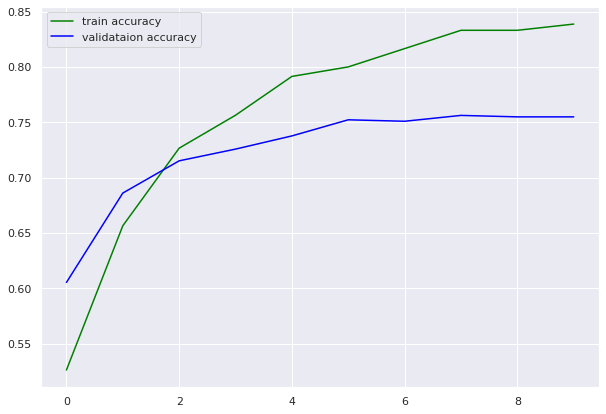

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(plot_train_acc, color='green', label='train accuracy')
plt.plot(plot_val_acc, color='blue', label='validataion accuracy')
plt.legend()
plt.savefig('./images/train_val_accuracy.png')
plt.show()

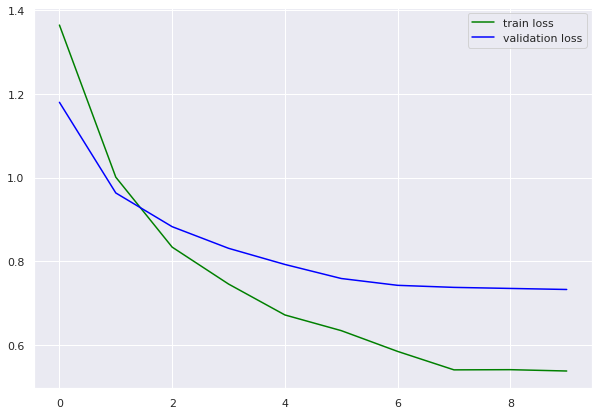

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(plot_train_loss, color='green', label='train loss')
plt.plot(plot_val_loss, color='blue', label='validation loss')
plt.legend()
plt.savefig('./images/train_val_loss.png')
plt.show()

In [ ]:
# Train the model as a whole
for param in efficientnet.parameters():
    param.requires_grad = True

# We will use ADAM as our opitimiser
optimizer_final = optim.Adam(efficientnet.parameters(), lr=0.001)
# Exponentially Decay LR by a factor of 0.1
exp_lr_scheduler_final = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

efficientnet_final = train_model(efficientnet_classifier_done, loss_fn, optimizer_final, 
                                 exp_lr_scheduler_final, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6141 Acc: 0.8127


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


val Loss: 0.4910 Acc: 0.8781

Epoch 1/24
----------
train Loss: 0.1534 Acc: 0.9573
val Loss: 0.3993 Acc: 0.8980

Epoch 2/24
----------
train Loss: 0.1346 Acc: 0.9593
val Loss: 0.3659 Acc: 0.9245

Epoch 3/24
----------
train Loss: 0.0942 Acc: 0.9656
val Loss: 0.4250 Acc: 0.9126

Epoch 4/24
----------
train Loss: 0.1374 Acc: 0.9586
val Loss: 2.4885 Acc: 0.8013

Epoch 5/24
----------
train Loss: 0.1229 Acc: 0.9613
val Loss: 0.4089 Acc: 0.9219

Epoch 6/24
----------
train Loss: 0.0430 Acc: 0.9858
val Loss: 0.2913 Acc: 0.9351

Epoch 7/24
----------
train Loss: 0.0613 Acc: 0.9805
val Loss: 0.3667 Acc: 0.9179

Epoch 8/24
----------
train Loss: 0.0548 Acc: 0.9854
val Loss: 0.2809 Acc: 0.9510

Epoch 9/24
----------
train Loss: 0.0730 Acc: 0.9821
val Loss: 0.2850 Acc: 0.9338

Epoch 10/24
----------
train Loss: 0.0480 Acc: 0.9864
val Loss: 0.6360 Acc: 0.8755

Epoch 11/24
----------
train Loss: 0.0893 Acc: 0.9768
val Loss: 0.5587 Acc: 0.8993

Epoch 12/24
----------
train Loss: 0.1733 Acc: 0.9510
v

In [ ]:
# If the above meet into cuda memory errors, run the following to clear some memory
import torch
torch.cuda.empty_cache()

import gc
gc.collect()

2648

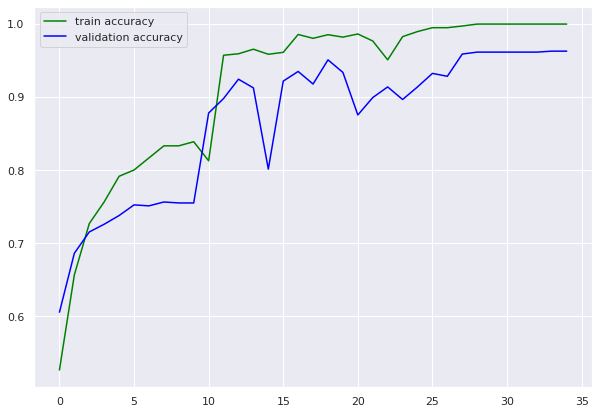

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(plot_train_acc, color='green', label='train accuracy')
plt.plot(plot_val_acc, color='blue', label='validation accuracy')
plt.legend()
plt.savefig('./images/train_val_accuracy_final.png')
plt.show()

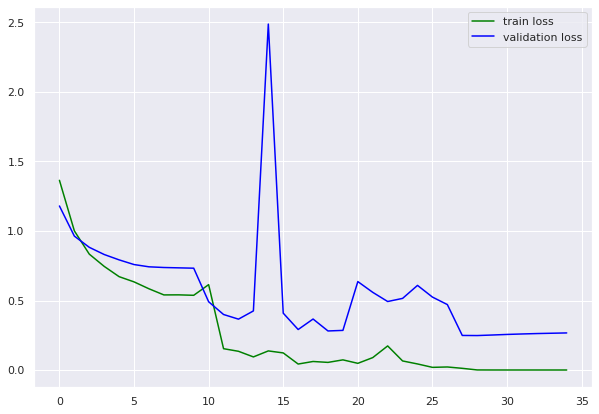

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(plot_train_loss, color='green', label='train loss')
plt.plot(plot_val_loss, color='blue', label='validation loss')
plt.legend()
plt.savefig('./images/train_val_loss_final.png')
plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/2. SUTD/SUTD Term 8/50.021 Artificial Intelligence /fish_are_mans_friend/models/efficientnet_10_25_full.pt"

torch.save(efficientnet_final, save_path)

In [ ]:
load_path = '/content/drive/MyDrive/fish_are_mans_friend/models/efficientnet_10_25_full.pt'

model.load(load_path)

# efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=True)

# model = augment_model(efficientnet)
# model.load_state_dict(torch.load(load_path))

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


<All keys matched successfully>